In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('D:/python folder/ww2.0.csv')

In [3]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30,SW,NW,6,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39,E,W,4,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85,N,NNE,6,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54,WNW,W,30,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50,SSE,ESE,20,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [4]:
le = LabelEncoder()
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])


In [5]:
X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'Humidity3pm']]
y = data['RainTomorrow']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)




LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('R-squared: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 0.93
R-squared: -2.72


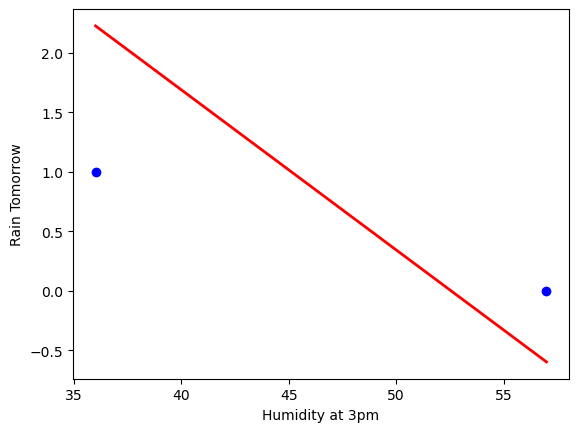

In [10]:
plt.scatter(X_test['Humidity3pm'], y_test, color='blue')
plt.plot(X_test['Humidity3pm'], y_pred, color='red', linewidth=2)
plt.xlabel('Humidity at 3pm')
plt.ylabel('Rain Tomorrow')
plt.show()